# 模型彙總與結構圖

## 模型

In [15]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=2, validation_split=0.2)

# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

Epoch 1/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8637 - loss: 0.4607 - val_accuracy: 0.9598 - val_loss: 0.1387
Epoch 2/2
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9585 - loss: 0.1395 - val_accuracy: 0.9697 - val_loss: 0.1026
loss: 0.0936
compile_metrics: 0.9721


## 模型彙總

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

## 取得神經層資訊

In [17]:
# 以 index 取得神經層資訊
model.get_layer(index=0)

<Flatten name=flatten_1, built=True>

In [19]:
# 以名稱取得神經層資訊
model.get_layer(name='dense_2')

<Dense name=dense_2, built=True>

In [25]:
# 取得神經層權重
model.get_layer(name='dense_2').get_weights()

[array([[ 0.02389524,  0.00672007, -0.04324533, ...,  0.05742444,
         -0.05698749, -0.01310325],
        [ 0.04246534,  0.00811551,  0.02555744, ...,  0.00184587,
         -0.01706266, -0.0089337 ],
        [ 0.07152641,  0.04344635, -0.02941999, ..., -0.01921664,
         -0.03589059,  0.05646728],
        ...,
        [ 0.0267777 ,  0.06570533,  0.00965212, ..., -0.07248692,
          0.03362882,  0.02501336],
        [-0.05870099, -0.06090344, -0.03614661, ..., -0.01725197,
         -0.05908165,  0.07464655],
        [-0.0597953 ,  0.01643458, -0.00244643, ..., -0.01865352,
          0.01862898, -0.04954796]], dtype=float32),
 array([-0.03913024,  0.15435942,  0.00918721, -0.0173637 ,  0.02792477,
         0.01329064, -0.04022524,  0.02451976,  0.01576822,  0.00638553,
        -0.02642227,  0.06362578,  0.0067807 , -0.07357373,  0.04086338,
        -0.00057797, -0.00212779,  0.04973862,  0.00518353,  0.01636064,
        -0.01540778,  0.01017707, -0.0399608 ,  0.0469825 ,  0.062

## 繪製結構圖

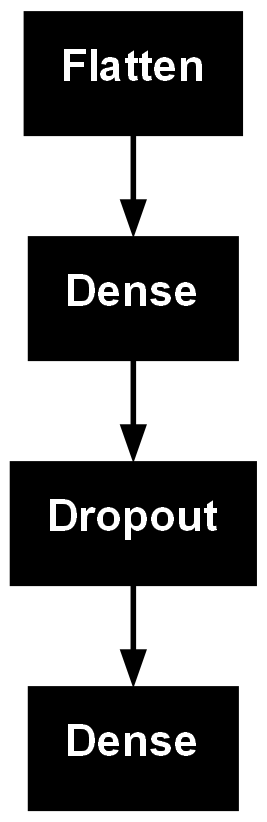

In [22]:
# 繪製結構圖
tf.keras.utils.plot_model(model, 'model.png')

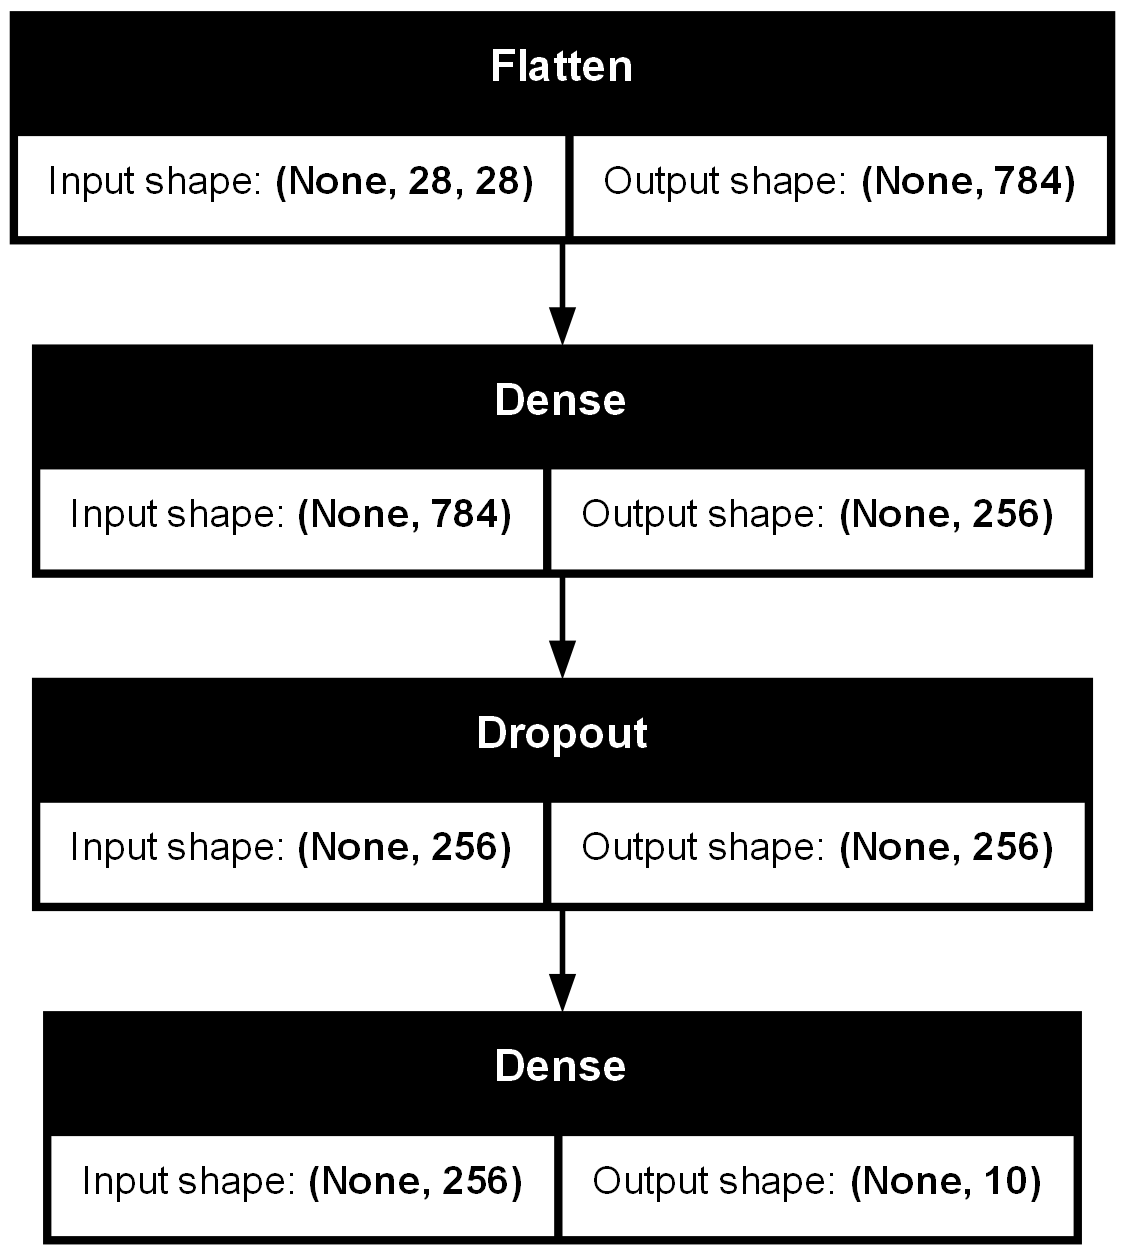

In [24]:
# 繪製結構圖，show_shapes=True
tf.keras.utils.plot_model(model, 'model_detail.png', show_shapes=True)

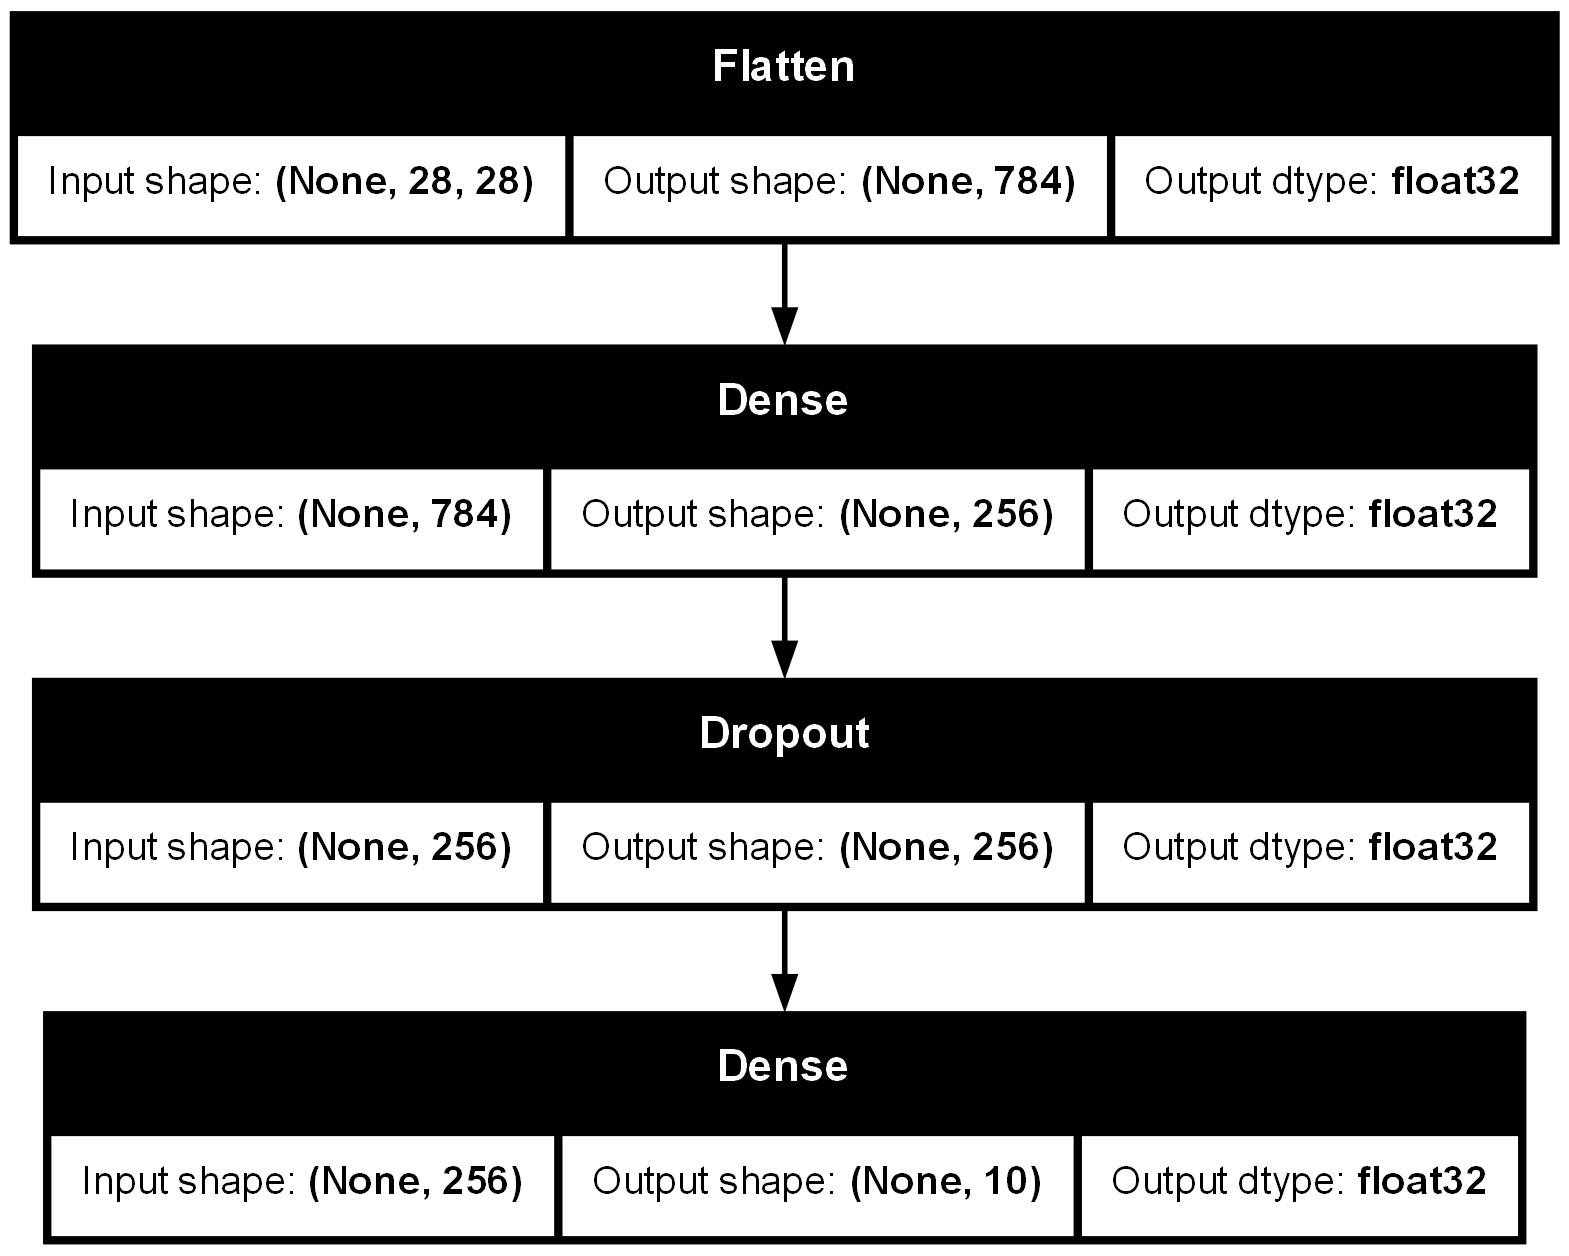

In [8]:
# 繪製結構圖
# show_shapes=True：可顯示輸入/輸出的神經元個數
# show_dtype=True：可顯示輸入/輸出的資料型態
# to_file：可同時存檔
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, 
                          to_file="model.png")

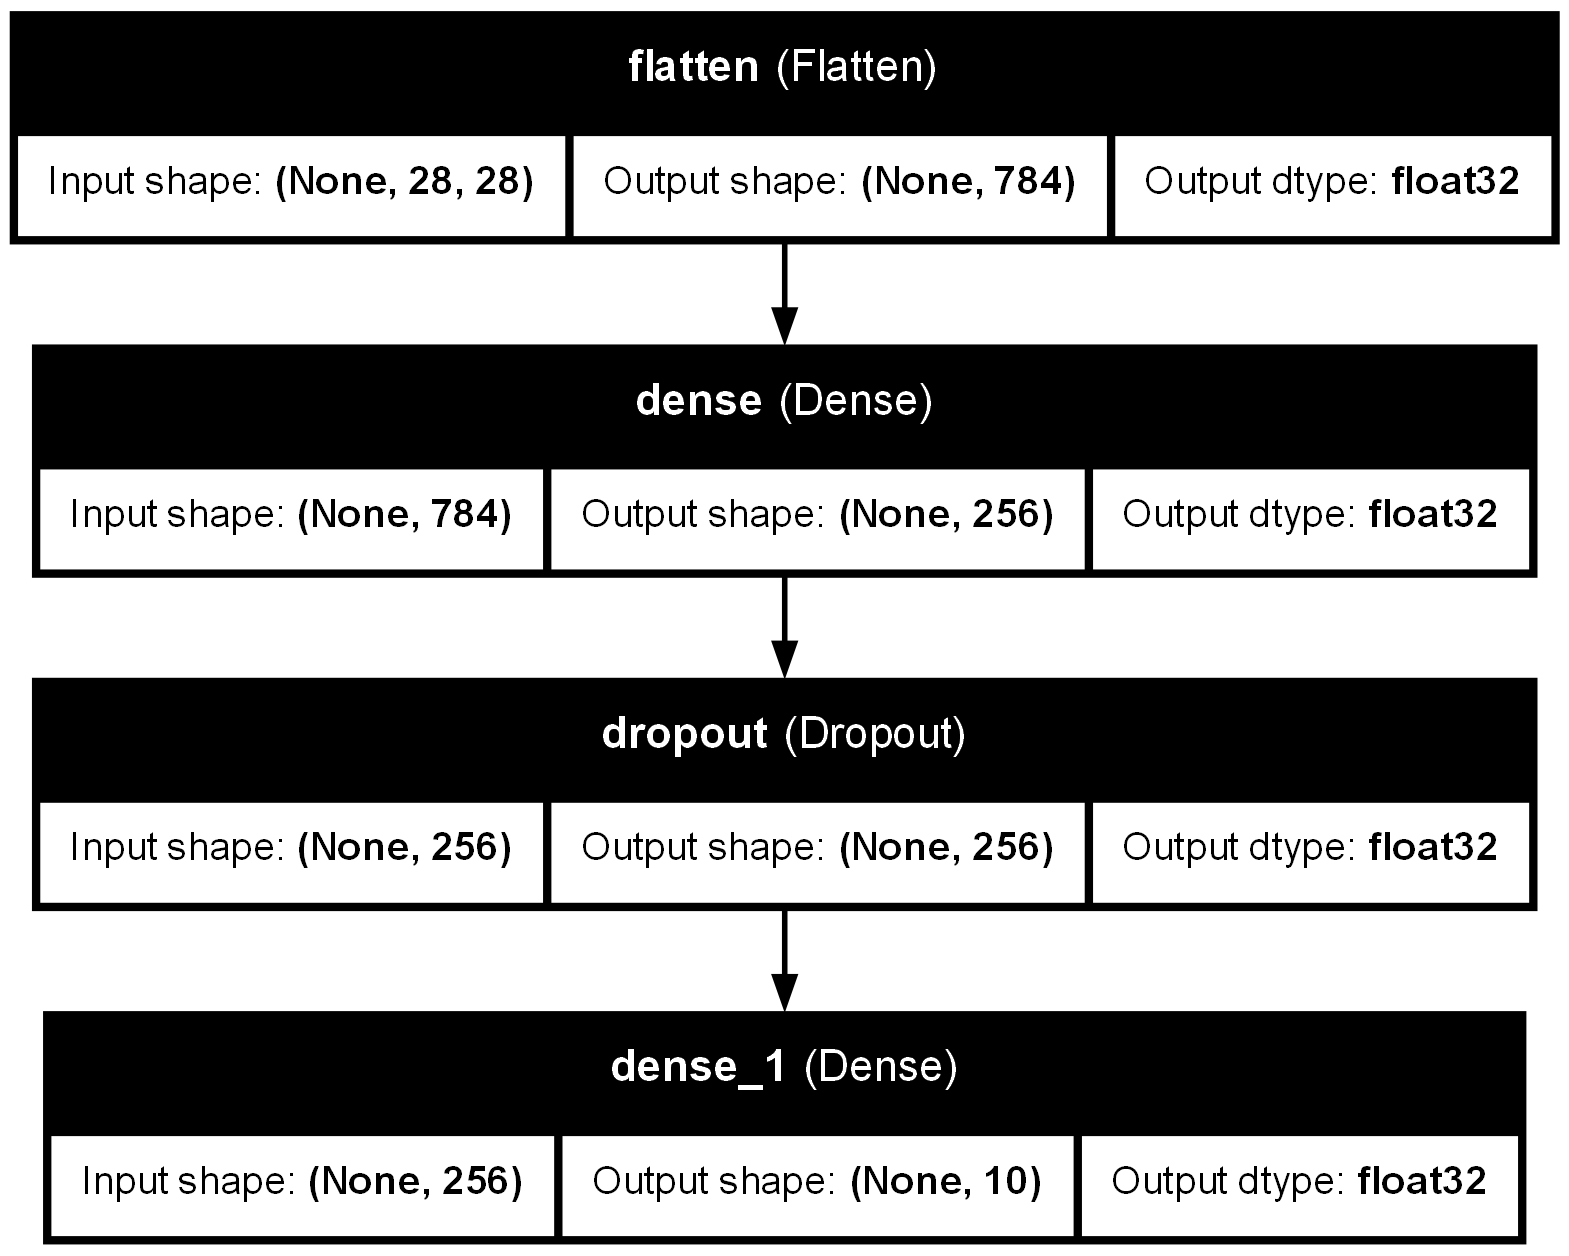

In [9]:
# 產生 dot 格式及 png 檔
import pydotplus as pdp
from IPython.display import display, Image

# 產生 dot 格式
dot1 = tf.keras.utils.model_to_dot(model, show_shapes=True, show_dtype=True)
# 產生 png 檔
display(Image(dot1.create_png()))